In [2]:
import cv2 
import matplotlib.pyplot as plt
import numpy as np

# Предобработка

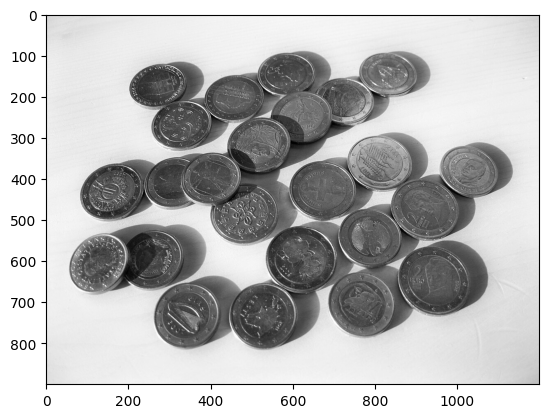

In [4]:
img = cv2.imread('coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

# Нахождение и подсчет монет

## Кенни

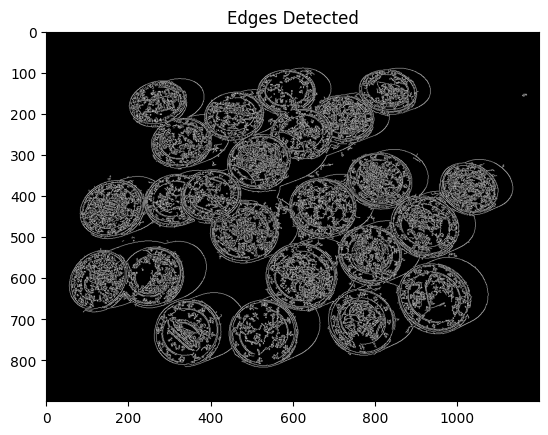

In [10]:
edges_Canny = cv2.Canny(gray, 30, 150)
plt.imshow(edges_Canny, cmap='gray')
plt.title('Edges Detected')
plt.show()

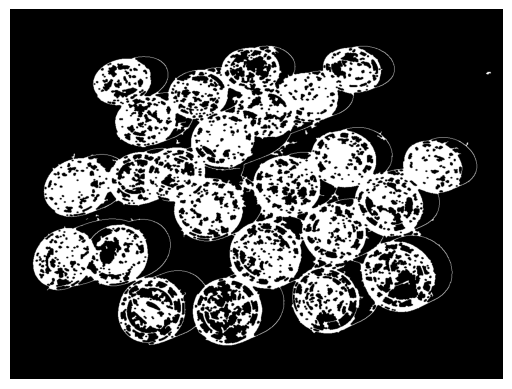

In [16]:
# Применение замыкающего фильтра с ядром в форме элипса, для отделения монет друг от друга
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
closed_Canny = cv2.morphologyEx(edges_Canny, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed_Canny, cmap='gray')
plt.axis('off')
plt.show()

In [12]:
# Нахождение контуров
contours_Canny, _ = cv2.findContours(closed_Canny, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# кол-во найденых монет
len(contours_Canny)

7

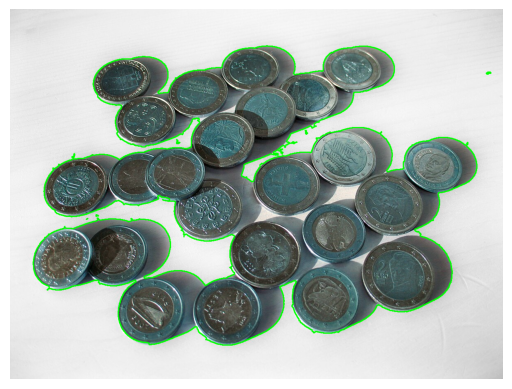

In [ ]:
# Отрисовка контуров
img_copy_Canny = img.copy()
cv2.drawContours(img_copy_Canny, contours_Canny, -1, (0, 255, 0), 2)
plt.imshow(img_copy_Canny, cmap='gray')
plt.axis('off')
plt.show()

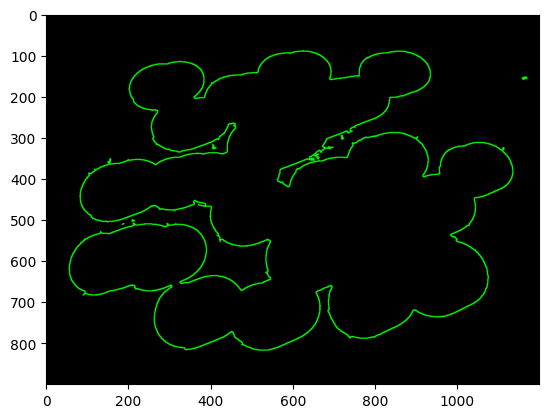

In [64]:
height, width = img.shape[:2]
empty_image = np.zeros((height, width, 3), dtype=np.uint8)
cv2.drawContours(empty_image, contours_Canny, -1, (0, 255, 0), 2)
plt.imshow(empty_image, cmap='gray')

## Собель

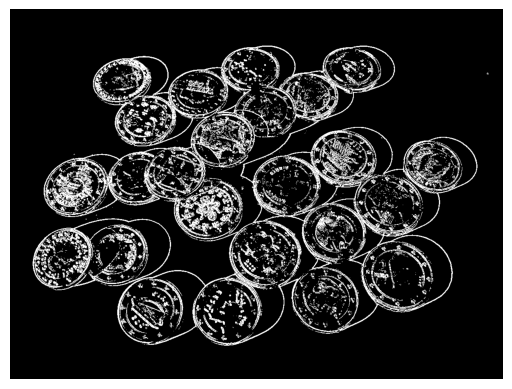

In [92]:
sobel_x_cv2 = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
sobel_y_cv2 = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
sobel_combined_cv2 = cv2.magnitude(sobel_x_cv2, sobel_y_cv2)
# Преобразование в абсолютные значения и бинаризация
abs_sobel_x = cv2.convertScaleAbs(sobel_combined_cv2)
_, Sobel_binary = cv2.threshold(abs_sobel_x, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(Sobel_binary, cmap='gray')
plt.axis('off')
plt.show()

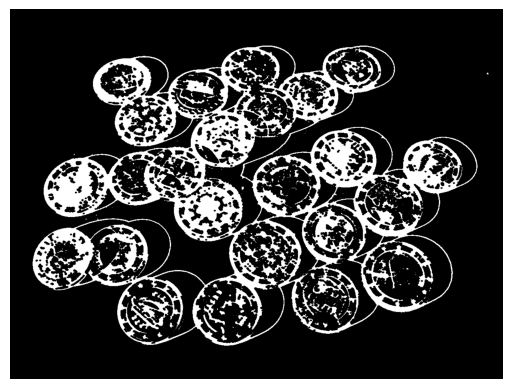

In [97]:
kernel_Sobel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
closed_Sobel = cv2.morphologyEx(Sobel_binary, cv2.MORPH_CLOSE, kernel_Sobel)
plt.imshow(closed_Sobel, cmap='gray')
plt.axis('off')
plt.show()

In [98]:
# Нахождение контуров
contours_Sobel, _ = cv2.findContours(closed_Sobel, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# кол-во найденых монет
len(contours_Sobel)

18

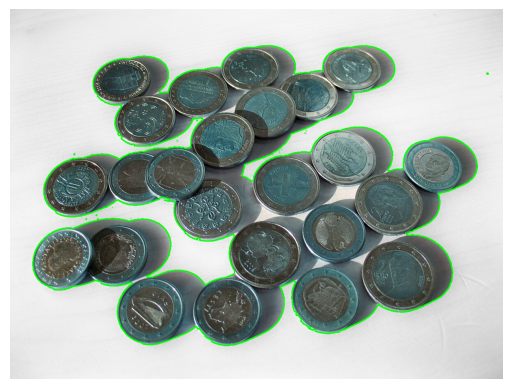

In [70]:
# Отрисовка контуров
img_copy_Sobel = img.copy()
cv2.drawContours(img_copy_Sobel, contours_Sobel, -1, (0, 255, 0), 2)
plt.imshow(img_copy_Sobel, cmap='gray')
plt.axis('off')
plt.show()

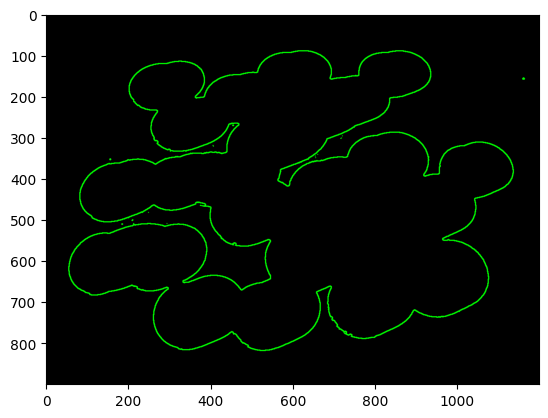

In [71]:
height, width = img.shape[:2]
empty_image = np.zeros((height, width, 3), dtype=np.uint8)
cv2.drawContours(empty_image, contours_Sobel, -1, (0, 255, 0), 2)
plt.imshow(empty_image, cmap='gray')

## Лаплас

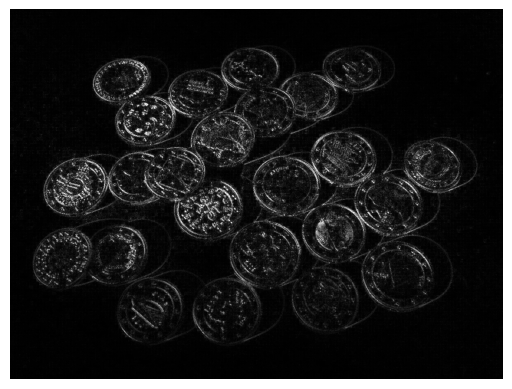

In [72]:
laplacian = cv2.Laplacian(gray, cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)
plt.imshow(laplacian_abs, cmap='gray')
plt.axis('off')
plt.show()

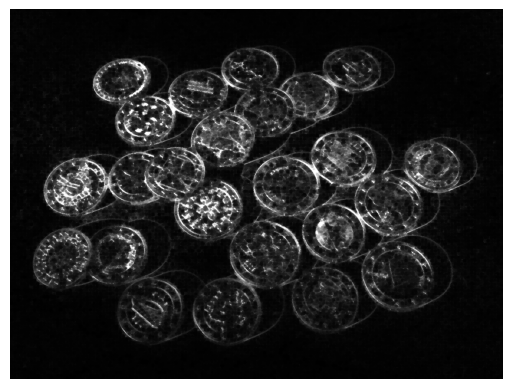

In [73]:
closed_Laplacian = cv2.morphologyEx(laplacian_abs, cv2.MORPH_CLOSE, kernel)
plt.imshow(closed_Laplacian, cmap='gray')
plt.axis('off')
plt.show()

In [74]:
# Нахождение контуров
contours_Laplacian, _ = cv2.findContours(closed_Laplacian, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# кол-во найденых монет
len(contours_Laplacian)

1

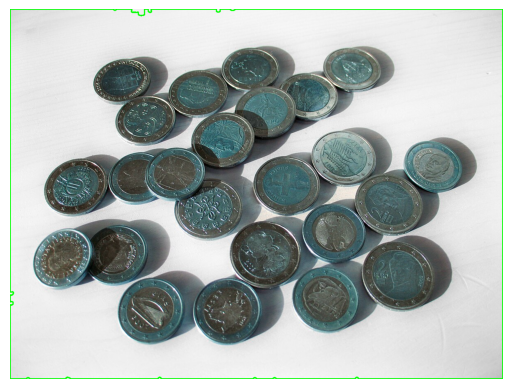

In [75]:
# Отрисовка контуров
img_copy_Laplacian = img.copy()
cv2.drawContours(img_copy_Laplacian, contours_Laplacian, -1, (0, 255, 0), 2)
plt.imshow(img_copy_Laplacian, cmap='gray')
plt.axis('off')
plt.show()

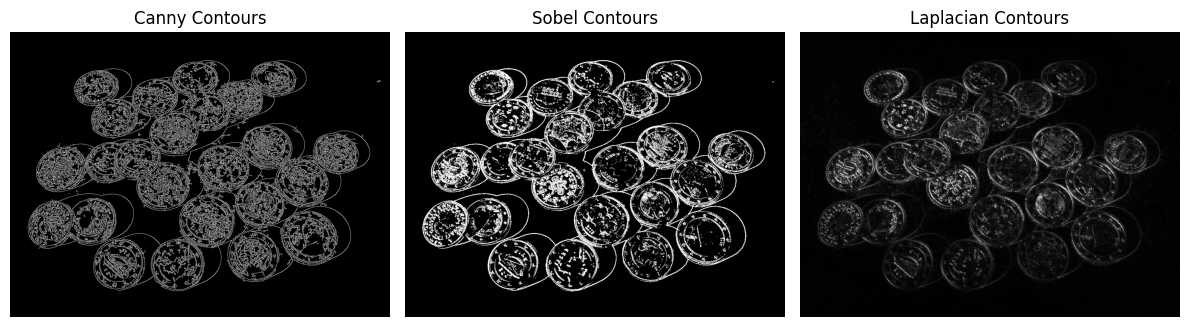

In [81]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
plt.imshow(edges_Canny, cmap='gray')
plt.title('Canny Contours')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(Sobel_binary, cmap='gray') 
plt.title('Sobel Contours')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(laplacian_abs, cmap='gray')
plt.title('Laplacian Contours')
plt.axis('off')
plt.tight_layout()
plt.show()

Результат не очень хороший, так как если монеты лежат друг на друге или рядом, то контуры не замыкаются и в одном контуре несколько монет.